In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('MSFT.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-18,202.800003,203.649994,196.250000,200.389999,198.567947,55225300
1,2020-09-21,197.190002,202.710007,196.380005,202.539993,200.698380,39839700
2,2020-09-22,205.059998,208.100006,202.080002,207.419998,205.534012,33517100
3,2020-09-23,207.899994,208.100006,200.029999,200.589996,198.766129,30803800
4,2020-09-24,199.850006,205.570007,199.199997,203.190002,201.342484,31202500


In [15]:
df.shape

(252, 7)

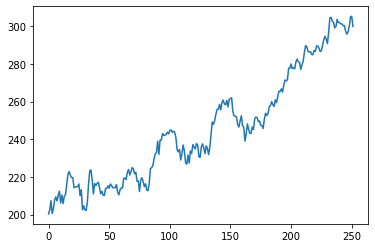

In [4]:
# plotting group for the closing price in the dataset
plt.plot(df['Close'])
plt.show()

In [5]:
# finding correlation between the features
correlation = df.corr()
correlation

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998373,0.998478,0.996253,0.996265,-0.370836
High,0.998373,1.000000,0.998533,0.998422,0.998404,-0.357275
Low,0.998478,0.998533,1.000000,0.998534,0.998558,-0.389073
Close,0.996253,0.998422,0.998534,1.000000,0.999958,-0.377970
Adj Close,0.996265,0.998404,0.998558,0.999958,1.000000,-0.377925
Volume,-0.370836,-0.357275,-0.389073,-0.377970,-0.377925,1.000000


<AxesSubplot:>

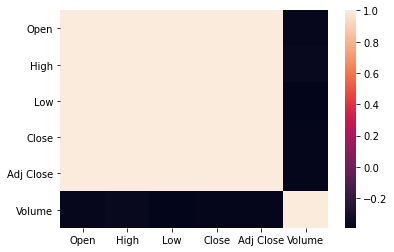

In [6]:
# heatmap for this correlated set
sns.heatmap(correlation)

In [7]:
# training our model

from sklearn.model_selection import train_test_split 

x = df[['Open','Low','High']]
y = df[['Close']]

x=x.to_numpy()
y=y.to_numpy()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [25]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([281.029999, 214.130005, 202.679993, 252.460007, 277.320007,
       207.820007, 234.509995, 233.270004, 246.229996, 251.720001,
       214.649994, 224.149994, 234.509995, 249.309998, 200.589996,
       277.660004, 252.179993, 284.910004, 214.800003, 219.619995,
       286.51001 , 253.589996, 277.320007, 244.199997, 212.419998,
       207.820007, 249.729996, 211.080002, 282.51001 , 202.470001,
       206.190002, 305.220001, 242.350006, 222.860001, 221.399994,
       243.029999, 212.419998, 258.26001 , 304.649994, 265.269989,
       232.330002, 215.369995, 258.73999 , 304.649994, 219.619995,
       214.460007, 214.289993, 212.419998, 281.029999, 214.460007,
       242.009995])

In [28]:
# creating a new data frame to store all the predicted and actual data
data = {'Predicted data':y_pred}
pred_data = pd.DataFrame(data)
pred_data.insert(1, "Actual data", y_test, True)
pred_data.head()

,Predicted data,Actual data
0,281.029999,281.399994
1,214.130005,213.869995
2,202.679993,209.830002
3,252.460007,253.250000
4,277.320007,279.929993


In [29]:
# finding the error
from sklearn.metrics import mean_squared_error
mean_squared_error(pred_data['Predicted data'],pred_data['Actual data'])

4.608966357325186

In [30]:
# findind the accuracy
from sklearn.metrics import r2_score
r2_score(pred_data['Predicted data'],pred_data['Actual data'])

0.9948242282030288